# **Analysis of Most Streamed Spotify Songs**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
spotify_streaming_df = pd.read_csv('spotify_most_streamed_songs.csv')
spotify_streaming_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found


Feature descriptions from the kaggle posting:

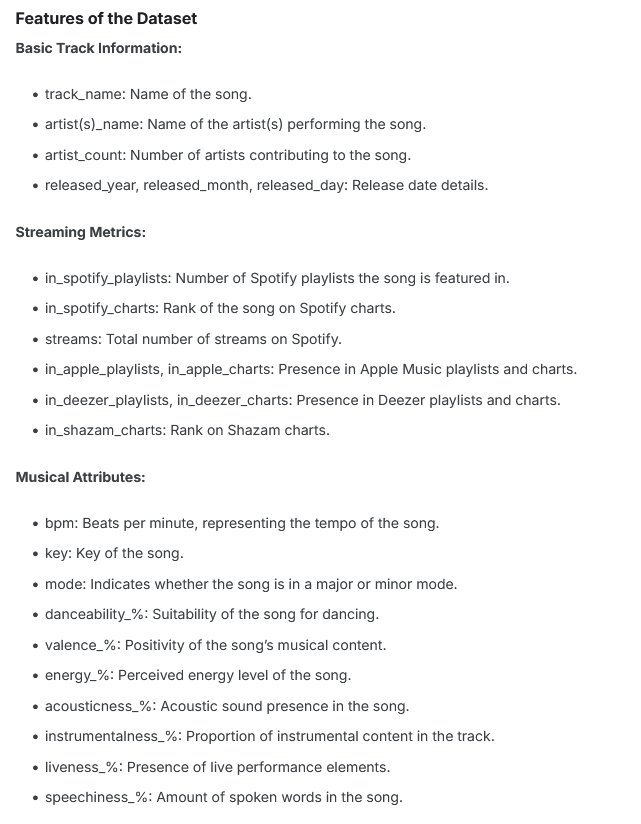

# **Cleaning the Data**

## **The Dirty Data**

In [38]:
spotify_streaming_df.dtypes

,0
track_name,object
artist(s)_name,object
artist_count,int64
released_year,int64
released_month,int64
released_day,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,object
in_apple_playlists,int64


There are a few columns whose datatypes need to be corrected as shown in the table below:

| Column | Description |
| ------ | ----------- |
| streams | The number of streams the songs has on spotify |
| in_deezer_playlists | The number of deezer playlists the song is in |
| in_shazam_charts | The ranking of the song on shazam charts |

The data in these columns is all strings, but it would be way more useful as ints.

In [39]:
# find num NA in each column
print(f'Col{22*" "}Number of NA')
print(40 * '-')
for col in spotify_streaming_df.columns:
  print(f'{col}{(25 - len(col)) * " "}{len(spotify_streaming_df[spotify_streaming_df[col].isna()])}')

print()
print(f'Total number of rows: {len(spotify_streaming_df)}')

Col                      Number of NA
----------------------------------------
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         50
bpm                      0
key                      95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0

Total number of rows: 953


The only columns with missing values are in_shazam_charts and key where the number of missing values is 5.25% and 9.97% of the total data respectively.

There are too many missing values to simply drop those rows, but fortunately those features aren't as central to the focus of the dataset.

It might be possible to obtain the missing keys for songs from the Spotify API if we need them later.

In [40]:
# check for duplicate tracks
num_tracks = len(spotify_streaming_df['track_name'])
num_unique_tracks = len(spotify_streaming_df['track_name'].unique())
dupe_check = "dupes detected" if num_tracks != num_unique_tracks else "no dupes detected"

print(dupe_check)
print(f'# of dupes: {num_tracks - num_unique_tracks}')

dupes detected
# of dupes: 10


It would appear that there are some tracks which share the same name.

In [41]:
dupes = spotify_streaming_df['track_name'].mode()
dupes

,track_name
0,About Damn Time
1,Daylight
2,Die For You
3,Flowers
4,Let It Snow! Let It Snow! Let It Snow!
5,Miss You
6,Numb
7,SNAP
8,SPIT IN MY FACE!
9,Take My Breath


The above are the 10 duplicate tracks.

In [42]:
spotify_streaming_df[spotify_streaming_df['track_name'] == 'About Damn Time']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,A#,Minor,84,72,74,10,0,34,7,https://i.scdn.co/image/ab67616d0000b273b817e7...
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,A#,Minor,84,72,74,10,0,34,7,https://i.scdn.co/image/ab67616d0000b273b817e7...


In [43]:
spotify_streaming_df[spotify_streaming_df['track_name'] == 'Take My Breath']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,A#,Minor,70,35,77,1,0,26,4,https://i.scdn.co/image/ab67616d0000b2734ab252...
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,G#,Major,75,53,74,2,0,11,5,https://i.scdn.co/image/ab67616d0000b2734ab252...


It looks like some of the duplicate tracks aren't necessarily duplicates as seen with Take My Breath by The Weeknd as the key, mode, and a few other traits differ.

However, in the case of About Damn Time by Lizzo, it looks like the only thing different between the two tracks is the release date and the metrics related to streams, charts, and playlists.

In order to see how many of the 10 dupes are "true dupes", let's check if they share more than just the track name.

In [44]:
dupe_traits = [
    'artist(s)_name',
    'artist_count',
    'key',
    'bpm',
    'mode',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
]

true_dupes = 0
for dupe in dupes:
  dupe_data = spotify_streaming_df[spotify_streaming_df['track_name'] == dupe]

  track1 = dupe_data.iloc[0]
  track2 = dupe_data.iloc[1]

  if track1[dupe_traits].eq(track2[dupe_traits]).all():
    print(f'True dupe detected: {track1["track_name"]}')
    true_dupes += 1

print(f'# of true dupes: {true_dupes}')

True dupe detected: About Damn Time
# of true dupes: 1


Looks like About Damn Time by Lizzo is the only real dupe in the dataset. Since it's only 1 track of 953, leaving it in won't cause any serious problems.

In [45]:
spotify_streaming_df[['released_year', 'released_month', 'released_day']]

,released_year,released_month,released_day
0,2023,7,14
1,2023,3,23
2,2023,6,30
3,2019,8,23
4,2023,5,18
...,...,...,...
948,2022,11,3
949,2022,10,21
950,2022,11,3
951,2022,10,20


The released_year, released_month, and released_day columns are good, but they would be even better as one column containing datetimes.

## **Getting the Grime Off (Actually Cleaning the Data)**

The first order of business is to convert the problematic columns (in_shazam_charts, in_deezer_playlists, and streams) from strings to ints.

In [46]:
spotify_streaming_df['in_deezer_playlists'] = spotify_streaming_df['in_deezer_playlists'].str.replace(',', '').astype(int)

The first one goes well, but it is the only column of the three that can be casted without errors.

The next column, in_shazam_charts fails because there are missing values.

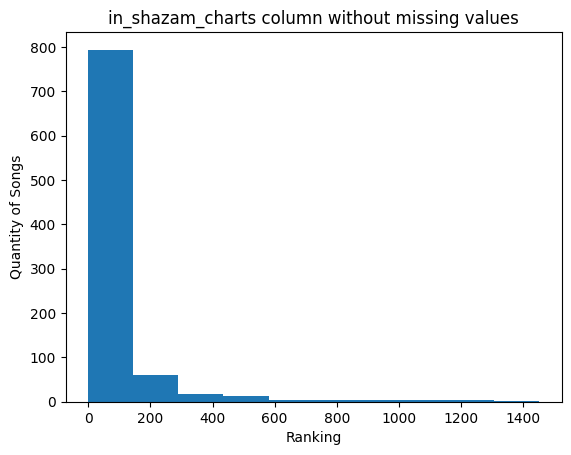

In [47]:
shazam_charts_without_na = spotify_streaming_df['in_shazam_charts'].dropna().str.replace(',', '').astype(int)

fig, ax = plt.subplots()

ax.set_title('in_shazam_charts column without missing values')
ax.set_xlabel('Ranking')
ax.set_ylabel('Quantity of Songs')
ax.hist(shazam_charts_without_na);

It's pretty safe to replace the missing values in the in_shazam_charts column with 0, seeing as that's where a vast majority of the data lies and it makes sense that most songs wouldn't be on the charts anyways.

In [48]:
spotify_streaming_df['in_shazam_charts'] = spotify_streaming_df['in_shazam_charts'].fillna('0').str.replace(',', '').astype(int)

The last column to convert to ints is the streams column which represents each song's number of streams on Spotify. The reason it fails to cast normally is due to a particular row having a malformed data point.

In [49]:
spotify_streaming_df[spotify_streaming_df['streams'].apply(lambda x: not(x.isdigit()))]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,A,Major,53,75,69,7,0,17,3,https://i.scdn.co/image/ab67616d0000b2739a0011...


Since it is a single row of 953 (0.105% of the data), it is fine to remove.

Once it is removed, the conversion is successful.

In [50]:
spotify_streaming_df.drop(574, inplace=True)
spotify_streaming_df['streams'] = spotify_streaming_df['streams'].astype(int)

Combining the released_year, released_month, and released_day columns into a single release_date column is pretty straightforward.

In [51]:
col_mapping = {
    'released_year': 'year',
    'released_month': 'month',
    'released_day': 'day'
}

release_dates = pd.to_datetime(spotify_streaming_df.rename(columns=col_mapping)[['year', 'month', 'day']])
spotify_streaming_df.insert(3, 'release_date', release_dates)
spotify_streaming_df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)

Now lets see the data after all the cleaning is done.

In [52]:
spotify_streaming_df

,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023-07-14,553,147,141381703,43,263,45,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023-03-23,1474,48,133716286,48,126,58,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023-06-30,1397,113,140003974,94,207,91,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019-08-23,7858,100,800840817,116,207,125,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023-05-18,3133,50,303236322,84,133,87,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022-11-03,953,0,91473363,61,13,37,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022-10-21,1180,0,121871870,4,0,8,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022-11-03,573,0,73513683,2,0,7,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022-10-20,1320,0,133895612,29,26,17,...,C#,Major,82,67,77,8,0,12,5,Not Found
